<a href="https://colab.research.google.com/github/SayuruA/Basics-of-Image-Processing/blob/main/Homography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/ImageProcessing/Images-20240814/fitting/"
building = "005.jpg"  # Architectural image
britishFlag = "flag.png"    # Image to be warped

building_img = cv.imread(path + building, cv.IMREAD_COLOR)
flag_img = cv.imread(path + britishFlag, cv.IMREAD_COLOR)

building_img = cv.cvtColor(building_img, cv.COLOR_BGR2RGB)
flag_img = cv.cvtColor(flag_img, cv.COLOR_BGR2RGB)



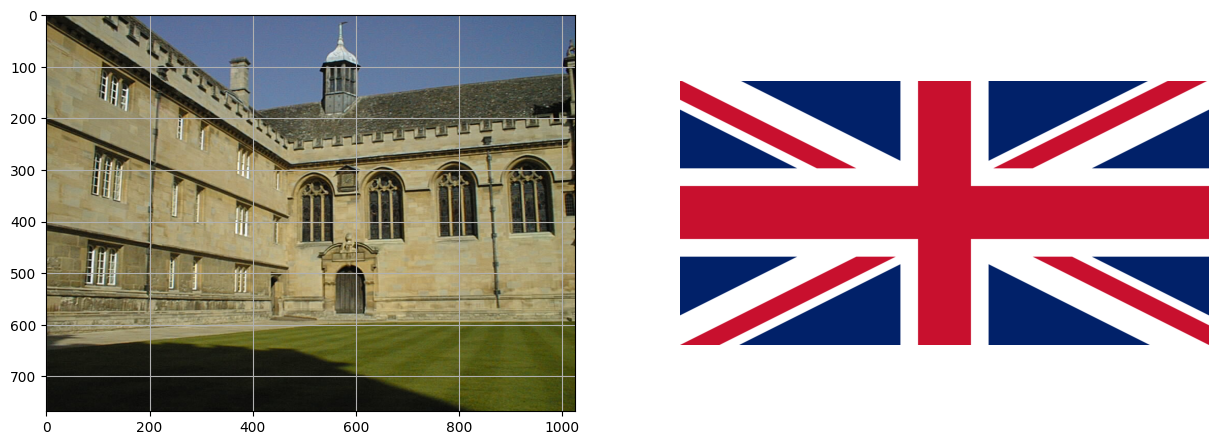

In [24]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(building_img)
plt.grid(True)
plt.subplot(1, 2, 2)
plt.imshow(flag_img)
plt.axis('off')
plt.show()

In [25]:
points_building = np.float32([[214.,  299.], [468., 397.],  [466., 486.],  [205., 440.]])

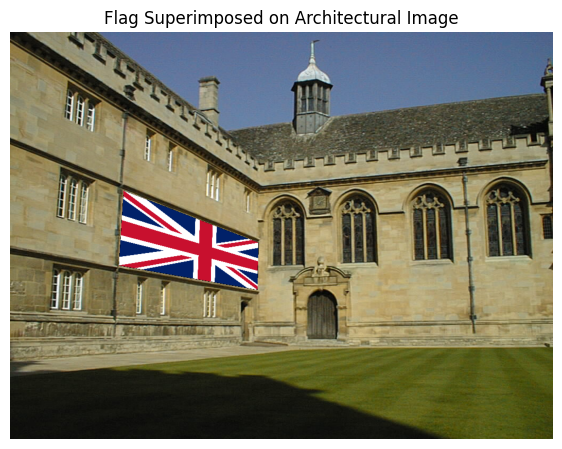

In [27]:





# Points from the flag image (it will be the four corners)
points_flag = np.float32([[0, 0], [flag_img.shape[1], 0], [flag_img.shape[1], flag_img.shape[0]], [0, flag_img.shape[0]]])

# Compute the homography matrix
H, _ = cv.findHomography(points_flag, points_building)

# Warp the flag image to fit the architectural plane
warped_flag = cv.warpPerspective(flag_img, H, (building_img.shape[1], building_img.shape[0]))

# Create a mask to blend the flag with the architectural image
mask = np.zeros_like(building_img, dtype=np.uint8)
cv.fillConvexPoly(mask, np.int32(points_building), (255, 255, 255))

# Invert the mask for blending
mask_inv = cv.bitwise_not(mask)

# Black-out the area of the flag in the architectural image
building_img_bg = cv.bitwise_and(building_img, mask_inv)

# Add the flag in the selected area
final_image = cv.add(building_img_bg, warped_flag)

# Display the result
plt.figure(figsize=(7,7))
plt.imshow(final_image)
plt.title('Flag Superimposed on Architectural Image')
plt.axis('off')
plt.show()
